# Point source modelling in qttpdesolver package.

We consider below the case of SolverFs (a new Finite Sum solver) and 2D stationary diffusion type PDE with scalar coefficient and point sources (see api_basic.ipynb first).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from qttpdesolver import Pde, SolverFs, auto_solve, MODE_NP, MODE_TT, MODE_SP

In [2]:
PDE = Pde()
PDE.txt = 'Simple 2D PDE with point source'
PDE.clean_model() # This is not necessary here, but should be call if model is changed for
                  # existing PDE instance.
PDE.set_dim(2)

def k_func(x, y):
    return 1. + x*y

PDE.k_txt = 'k  = 1+x*y' 
PDE.k = k_func

PDE.set_f_poi_src([[0.2, 0.2], [0.2, 0.8], [0.8, 0.8], [0.8, 0.2]], # list of [x, y] coordinates
                  [3., 3., 3., 3.])                                 # list of source values
PDE.f_txt = 'f  = 4 point sources near corners'
#PDE.present_model()

  Construction of iDx
=multifuncrs= sweep 1{2}, max_dy: 6.702e-01, erank: 5.65685
=multifuncrs= sweep 2{1}, max_dy: 1.162e-06, erank: 9.16515
=multifuncrs= sweep 2{2}, max_dy: 1.162e-06, erank: 9.79796
=multifuncrs= sweep 3{1}, max_dy: 1.826e-11, erank: 10.0499
  Construction of iDy
=multifuncrs= sweep 1{2}, max_dy: 6.688e-01, erank: 5.65685
=multifuncrs= sweep 2{1}, max_dy: 2.167e-07, erank: 9.16515
=multifuncrs= sweep 2{2}, max_dy: 2.167e-07, erank: 9.79796
=multifuncrs= sweep 3{1}, max_dy: 1.826e-11, erank: 10.0499
  Construction of inverse for Q0
=multifuncrs= sweep 1{2}, max_dy: 4.293e+04, erank: 6
=multifuncrs= sweep 2{1}, max_dy: 1.539e-11, erank: 6.08276
  Construction of inverse for Q1
=multifuncrs= sweep 1{2}, max_dy: 4.293e+04, erank: 6
=multifuncrs= sweep 2{1}, max_dy: 1.539e-11, erank: 6.08276
Time of matrices generation: 0.7759  
Time of system generation  : 0.0865  
amen_solve: swp=1, max_dx= 1.007E+00, max_res= 9.167E-01, max_rank=13
amen_solve: swp=2, max_dx= 3.017E-01

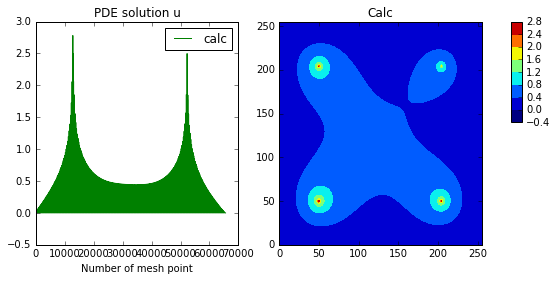

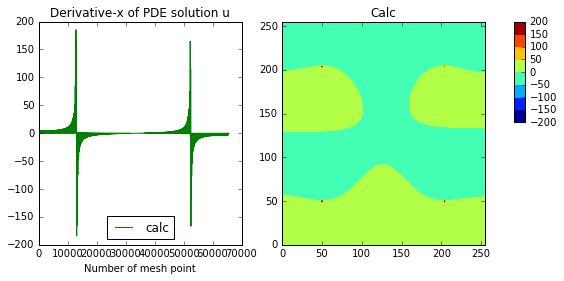

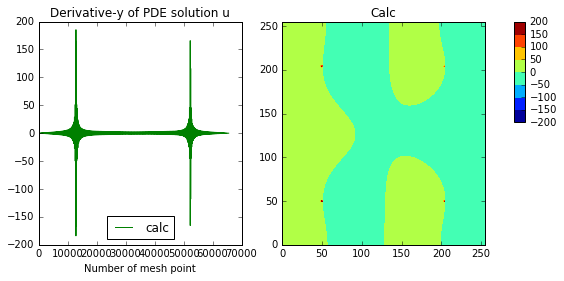

In [3]:
PDE.set_mode(MODE_TT)
PDE.set_solver_txt('fs')
PDE.set_verb(True, True, True)
PDE.set_with_en(False)
PDE.set_tau(tau_round=1.E-10, tau_cross=1.E-10, tau_amens=1.E-6)
PDE.set_algss_par(nswp=6, kickrank=4, local_prec='n', local_iters=2,
                  local_restart=20, trunc_norm=1, max_full_size=1000,
                  tau_u_calc_from_algss=True)
PDE.update_d(8)
PDESolver = auto_solve(PDE, return_solver=True)
#PDE.present_res()
PDE.plot_res()

  Construction of Dx
=multifuncrs= sweep 1{2}, max_dy: 4.540e-01, erank: 5.65685
=multifuncrs= sweep 2{1}, max_dy: 9.392e-16, erank: 6.08276
  Construction of Dy
=multifuncrs= sweep 1{2}, max_dy: 4.532e-01, erank: 5.65685
=multifuncrs= sweep 2{1}, max_dy: 4.994e-16, erank: 6.08276
Time of matrices generation: 0.2675  
Time of system generation  : 0.0237  
amen_solve: swp=1, max_dx= 2.980E+05, max_res= 3.378E+05, max_rank=6
amen_solve: swp=2, max_dx= 4.274E-01, max_res= 2.884E-01, max_rank=10
amen_solve: swp=3, max_dx= 2.703E-01, max_res= 1.592E-01, max_rank=14
amen_solve: swp=4, max_dx= 2.926E-01, max_res= 8.848E-02, max_rank=18
amen_solve: swp=5, max_dx= 2.430E-01, max_res= 6.270E-02, max_rank=22
amen_solve: swp=6, max_dx= 8.649E-02, max_res= 1.581E-02, max_rank=26
Time of system solving     : 1.1097  
Time of additional calcs.  : 0.0202  
d=8 |fd-tt|T=1.401  |R=18.1 |It=6 


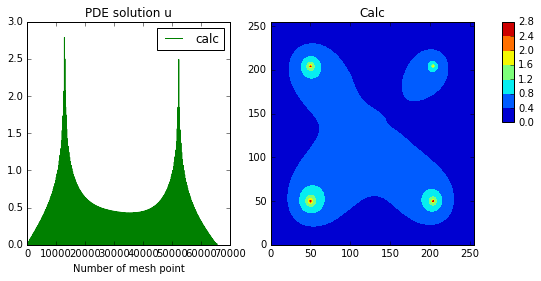

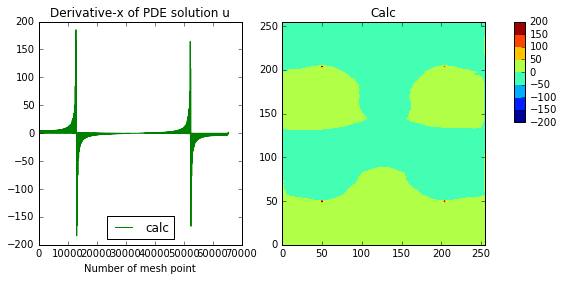

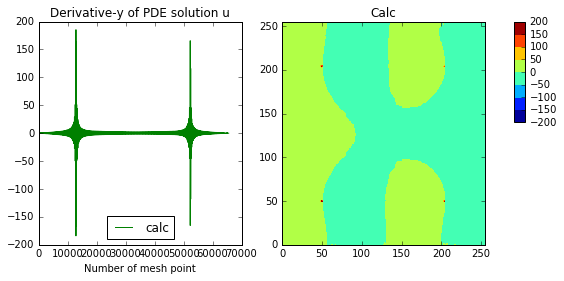

In [4]:
PDE.set_mode(MODE_TT)
PDE.set_solver_txt('fd')
PDE.set_verb(True, True, True)
PDE.set_with_en(False)
PDE.set_tau(tau_round=1.E-10, tau_cross=1.E-10, tau_amens=1.E-6)
PDE.set_algss_par(nswp=6, kickrank=4, local_prec='n', local_iters=2,
                  local_restart=20, trunc_norm=1, max_full_size=1000,
                  tau_u_calc_from_algss=True)
PDE.update_d(8)
PDESolver = auto_solve(PDE, return_solver=True)
#PDE.present_res()
PDE.plot_res()

Time of matrices generation: 0.0936  
Time of system generation  : 0.2664  
Time of system solving     : 1.9706  
Time of additional calcs.  : 0.0025  
d=8 |fd-sp|T=2.331  


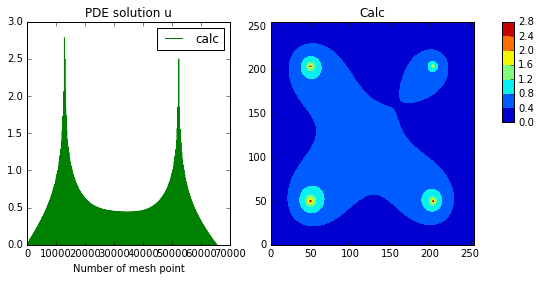

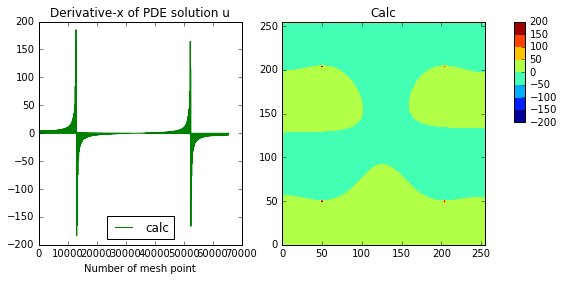

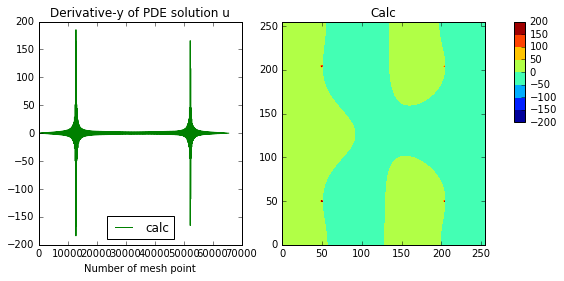

In [11]:
PDE.set_mode(MODE_SP)
PDE.set_solver_txt('fd')
PDE.set_verb(True, True, True)
PDE.set_with_en(False)
PDE.set_algss_par(nswp=6, kickrank=4, local_prec='n', local_iters=2,
                  local_restart=20, trunc_norm=1, max_full_size=1000,
                  tau_u_calc_from_algss=True)
PDE.update_d(8)
PDESolver = auto_solve(PDE, return_solver=True)
#PDE.present_res()
PDE.plot_res()

In [5]:
PDE.set_mode(MODE_TT)
PDE.set_solver_txt('fd')
PDE.set_verb(True, True, True)
PDE.set_with_en(False)
PDE.set_tau(tau_round=1.E-10, tau_cross=1.E-10, tau_amens=1.E-6)
PDE.set_algss_par(nswp=6, kickrank=4, local_prec='n', local_iters=2,
                  local_restart=20, trunc_norm=1, max_full_size=1000,
                  tau_u_calc_from_algss=True)
PDE.update_d(10)
PDESolver = auto_solve(PDE, return_solver=True)

  Construction of Dx
=multifuncrs= sweep 1{2}, max_dy: 4.547e-01, erank: 5.83095
=multifuncrs= sweep 2{1}, max_dy: 7.397e-16, erank: 6.245
  Construction of Dy
=multifuncrs= sweep 1{2}, max_dy: 4.544e-01, erank: 5.83095
=multifuncrs= sweep 2{1}, max_dy: 9.357e-16, erank: 6.245
Time of matrices generation: 0.3265  
Time of system generation  : 0.0321  
amen_solve: swp=1, max_dx= 4.768E+06, max_res= 5.404E+06, max_rank=6
amen_solve: swp=2, max_dx= 4.113E-01, max_res= 3.053E-01, max_rank=10
amen_solve: swp=3, max_dx= 2.840E-01, max_res= 1.420E-01, max_rank=14
amen_solve: swp=4, max_dx= 3.556E-01, max_res= 1.663E-01, max_rank=18
amen_solve: swp=5, max_dx= 3.570E-01, max_res= 1.995E-01, max_rank=22
amen_solve: swp=6, max_dx= 1.653E-01, max_res= 2.334E-02, max_rank=26
Time of system solving     : 2.0187  
Time of additional calcs.  : 0.0195  
d=10|fd-tt|T=2.377  |R=19.9 |It=6 


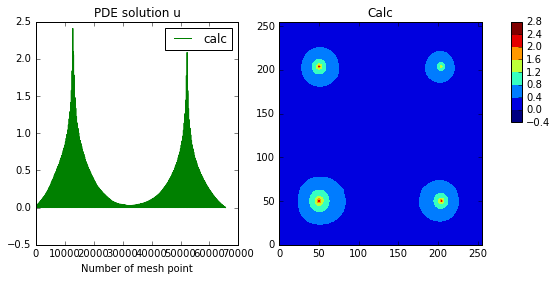

In [6]:
from qttpdesolver.utils.transform2mesh import transform2coarser
PDEnew = PDE.copy()

u_calc = PDE.u_calc.copy()
reps = 2
PDEnew.u_calc = transform2coarser(u_calc, PDE.dim, tau=1.E-8, reps=reps)
PDEnew.update_d(PDE.d-reps)
PDEnew.plot_res()

In [18]:
PDE.set_mode(MODE_TT)
PDE.set_solver_txt('fs')
PDE.set_verb(True, True, True)
PDE.set_with_en(False)
PDE.set_tau(tau_round=1.E-10, tau_cross=1.E-10, tau_amens=1.E-6)
PDE.set_algss_par(nswp=6, kickrank=5, local_prec='n', local_iters=2,
                  local_restart=100, trunc_norm=1, max_full_size=500,
                  tau_u_calc_from_algss=True)
PDE.update_d(10)
PDESolver = auto_solve(PDE, return_solver=True)

  Construction of iDx
=multifuncrs= sweep 1{2}, max_dy: 6.704e-01, erank: 5.83095
=multifuncrs= sweep 2{1}, max_dy: 2.303e-07, erank: 9.32738
=multifuncrs= sweep 2{2}, max_dy: 2.303e-07, erank: 10.0499
=multifuncrs= sweep 3{1}, max_dy: 1.849e-11, erank: 10.2956
  Construction of iDy
=multifuncrs= sweep 1{2}, max_dy: 6.701e-01, erank: 5.83095
=multifuncrs= sweep 2{1}, max_dy: 1.170e-06, erank: 9.32738
=multifuncrs= sweep 2{2}, max_dy: 1.170e-06, erank: 10.0499
=multifuncrs= sweep 3{1}, max_dy: 1.849e-11, erank: 10.2956
  Construction of inverse for Q0
=multifuncrs= sweep 1{2}, max_dy: 6.874e+05, erank: 6.40312
=multifuncrs= sweep 2{1}, max_dy: 7.980e-12, erank: 6.63325
  Construction of inverse for Q1
=multifuncrs= sweep 1{2}, max_dy: 6.874e+05, erank: 6.40312
=multifuncrs= sweep 2{1}, max_dy: 8.006e-12, erank: 6.63325
Time of matrices generation: 0.9639  
Time of system generation  : 0.1200  
amen_solve: swp=1, max_dx= 1.015E+00, max_res= 9.172E-01, max_rank=14
amen_solve: swp=2, max_d

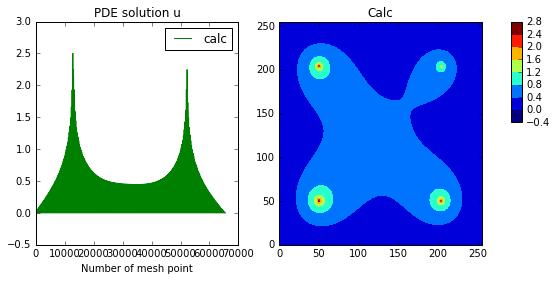

In [19]:
from qttpdesolver.utils.transform2mesh import transform2coarser
PDEnew = PDE.copy()

u_calc = PDE.u_calc.copy()
reps = 2
PDEnew.u_calc = transform2coarser(u_calc, PDE.dim, tau=1.E-8, reps=reps)
PDEnew.update_d(PDE.d-reps)
PDEnew.plot_res()